In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42)

In [4]:
# Using Kmeans Unsupervised algorithm so we only work on X data not y.
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]], shape=(1000, 2))

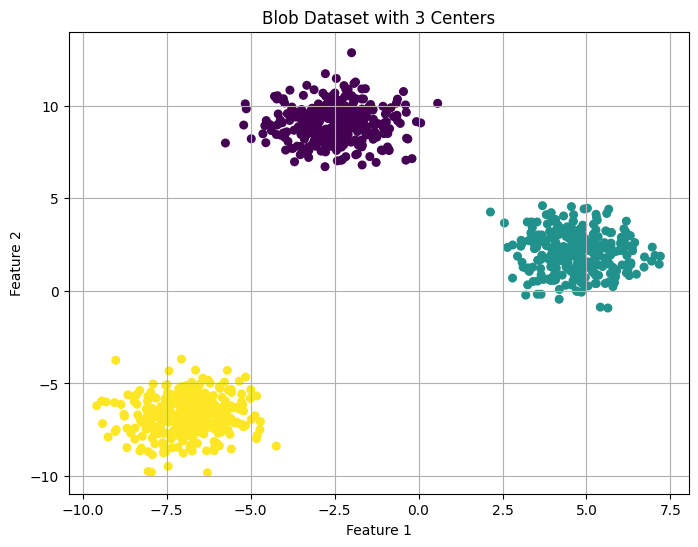

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Blob Dataset with 3 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [7]:
# Standardization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Initializing Kmeans
from sklearn.cluster import KMeans

In [9]:
## Elbow method to select K value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++",random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

wcss

[1339.9999999999998,
 424.77950428412703,
 43.537817283488835,
 36.755326197789756,
 30.940038308444805,
 28.52985315339557,
 23.428595054568554,
 21.47598838070659,
 19.455483512927863,
 17.417609884223136]

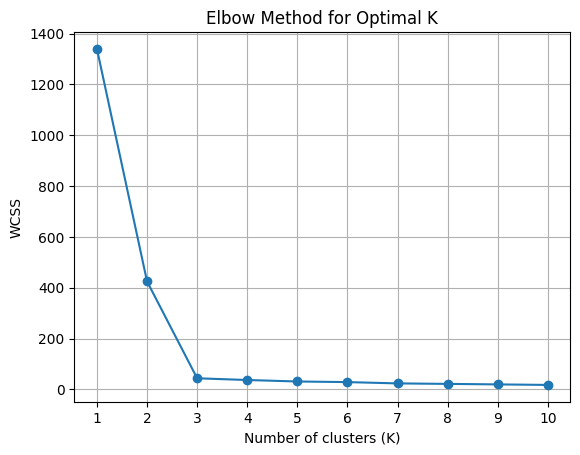

In [10]:
#Ploting elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xticks(range(1, 11))
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# We can see that until value of k=3, WCSS decreases abruptly and after that
# it stabalizes, so we use value of k equals to 3.

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
kmeans.fit_predict(X_train_scaled)

array([0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0,
       0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2,
       2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0,
       2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2,
       0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0,
       1, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1,
       0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2,

In [13]:
y_pred = kmeans.predict(X_test_scaled)
y_pred

array([2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0,
       2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0,
       2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0,
       1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0,
       2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1,

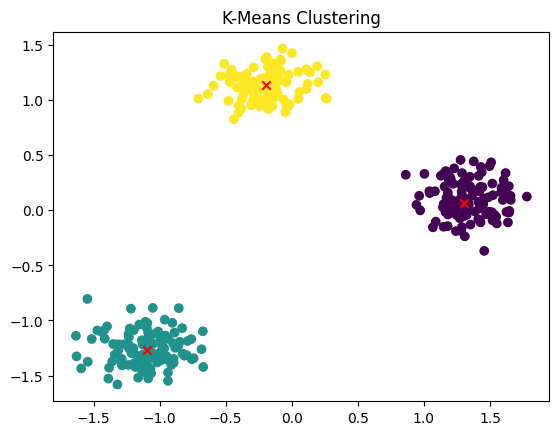

In [14]:
centroids = kmeans.cluster_centers_
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_pred, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], color='red', marker='x')
plt.title("K-Means Clustering")
plt.show()

In [15]:
# Validating the K value
# Two techniques--> 1. kneelocator    2. Silhoutees scoring

# Kneelocator
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

In [17]:
# Silhoutees scoring
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=42)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[np.float64(0.6857199772837788),
 np.float64(0.842476016737992),
 np.float64(0.6774649019945745),
 np.float64(0.5105088132790424),
 np.float64(0.4951305131846498),
 np.float64(0.34160351165567765),
 np.float64(0.3512922210110367),
 np.float64(0.34274188333461303),
 np.float64(0.33357979708657043)]

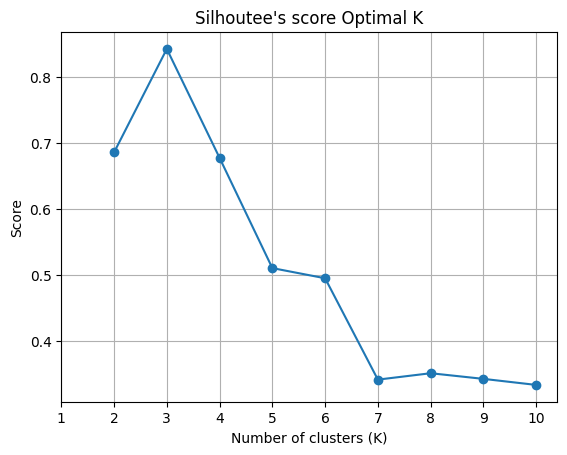

In [18]:
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.xticks(range(1, 11))
plt.title("Silhoutee's score Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# we can see that the score for k=3 is highest and for rest after it is decreasing
# So value of k=3 is validated